# # Notebook looking at S&P 500 data since 2020 

- Notebook using `BeautifulSoup` to have a list of S&P 500 companies. Plot their market capital as a function of months. 
- Want to see that variation of market capitalisation across companies and sectors 
- Trying to recreate analysis seen else where 

Skills used: 
* Panda DateTime data wrangling 
* Beautifulsoup web scraping 

### ### To extract stock information
To extract stock information we will use `yfinance` module which is a convenient way to download data from Yahoo Finance. The official API for Yahoo Finance was decommissioned some time back. More details about this module can be found [here.](https://aroussi.com/post/python-yahoo-finance) 

In [1]:
from requests import get 
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup
import time as time 
from tqdm import tqdm
import yfinance as yf

from IPython.core.display import clear_output

In [2]:
#----- PLOTTING PARAMS ----# 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
sns.set(style="whitegrid")
sns.color_palette("husl")
%config InlineBackend.figure_format = 'retina'
 
plot_params = {
'font.size' : 22,
'axes.titlesize' : 24,
'axes.labelsize' : 20,
'axes.labelweight' : 'bold',
#'lines.linewidth' : 3,
#'lines.markersize' : 10,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16,
}
 
plt.rcParams.update(plot_params)

## ## First: Get list of S&P 500 companies 

In [3]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
response = get(wiki_url)
html_soup = BeautifulSoup(response.text, 'html.parser')
tab = html_soup.find("table",{"class":"wikitable sortable"})

In [4]:
column_headings = [entry.text.strip() for entry in tab.findAll('th')]
print(column_headings)

['Symbol', 'Security', 'SEC filings', 'GICS Sector', 'GICS Sub Industry', 'Headquarters Location', 'Date first added', 'CIK', 'Founded']


In [5]:
SP_500_dict = {keys:[] for keys in column_headings}

In [6]:
for i, name in enumerate(SP_500_dict.keys()):
    print(i, name)

0 Symbol
1 Security
2 SEC filings
3 GICS Sector
4 GICS Sub Industry
5 Headquarters Location
6 Date first added
7 CIK
8 Founded


## ## Populate each row entry as per company data

In [7]:
for row_entry in tab.findAll('tr')[1:]:
    row_elements = row_entry.findAll('td')
    for key, _elements in zip(SP_500_dict.keys(), row_elements):
        SP_500_dict[key].append(_elements.text.strip())

In [8]:
SP_500_df = pd.DataFrame(SP_500_dict, columns=SP_500_dict.keys())

In [9]:
SP_500_df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,0000066740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,0000109380,1873


In [10]:
SP_500_df['GICS Sector'].value_counts()

Industrials               73
Information Technology    71
Financials                66
Health Care               62
Consumer Discretionary    61
Consumer Staples          33
Real Estate               31
Materials                 28
Utilities                 28
Communication Services    26
Energy                    26
Name: GICS Sector, dtype: int64

In [11]:
SP_500_df.loc[ SP_500_df['GICS Sector'] == 'Energy']

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
44,APA,Apache Corporation,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,0000006769,1954
60,BKR,Baker Hughes Co,reports,Energy,Oil & Gas Equipment & Services,"Houston, Texas",2017-07-07,0001701605,2017
81,COG,Cabot Oil & Gas,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2008-06-23,0000858470,1989
101,CVX,Chevron Corp.,reports,Energy,Integrated Oil & Gas,"San Ramon, California",1957-03-04,0000093410,1879
121,CXO,Concho Resources,reports,Energy,Oil & Gas Exploration & Production,"Midland, Texas",2016-02-22,0001358071,
122,COP,ConocoPhillips,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1957-03-04,0001163165,2002
142,DVN,Devon Energy,reports,Energy,Oil & Gas Exploration & Production,"Oklahoma City, Oklahoma",2000-08-30,0001090012,
144,FANG,Diamondback Energy,reports,Energy,Oil & Gas Exploration & Production,"Midland, Texas",2018-12-03,0001539838,2007
171,EOG,EOG Resources,reports,Energy,Oil & Gas Exploration & Production,"Houston, Texas",2000-11-02,0000821189,
184,XOM,Exxon Mobil Corp.,reports,Energy,Integrated Oil & Gas,"Irving, Texas",1957-03-04,0000034088,1999


**We can parse these tables and search companies based on the sector**

In [12]:
SP_500_df.loc[ SP_500_df['GICS Sector'] == 'Information Technology']

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
6,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,0000796343,1982
7,AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,0000002488,1969
13,AKAM,Akamai Technologies Inc,reports,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,0001086222,1998
38,APH,Amphenol Corp,reports,Information Technology,Electronic Components,"Wallingford, Connecticut",2008-09-30,0000820313,1932
...,...,...,...,...,...,...,...,...,...
488,WDC,Western Digital,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Irvine, California",2009-07-01,0000106040,1970
489,WU,Western Union Co,reports,Information Technology,Data Processing & Outsourced Services,"Englewood, Colorado",2006-09-29,0001365135,1851
497,XRX,Xerox,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Norwalk, Connecticut",,0000108772,1906
498,XLNX,Xilinx,reports,Information Technology,Semiconductors,"San Jose, California",1999-11-08,0000743988,1984


## ## Get total number of Shares

We will use `yfinance` to extact Tickr information for each SP500 company and use pandas `datareader` 

```python
yf_tickr = yf.Ticker('ADBE')
yf_tickr.info['sharesOutstanding'] #info has good summary info for the stock 
```

In [13]:
import yfinance as yf

In [14]:
START_DATE = "2020-01-01"
END_DATE = "2020-07-26"

In [15]:
yf_tickr = yf.Ticker('ADBE')

In [16]:
_shares_outstanding = yf_tickr.info['sharesOutstanding']
_previous_close = yf_tickr.info['previousClose']
print('Outstanding shares: {}'.format(_shares_outstanding))
print('Market Cap: {} Million USD'.format((_shares_outstanding * _previous_close)/10**6))

Outstanding shares: 479664992
Market Cap: 210515.37168896 Million USD


In [17]:
df_tckr = yf_tickr.history(start=START_DATE, end=END_DATE, actions=False)
df_tckr['Market_Cap'] = df_tckr['Open'] * _shares_outstanding
df_tckr['YTD'] = (df_tckr['Open'] - df_tckr['Open'][0]) * 100 / df_tckr['Open'][0]

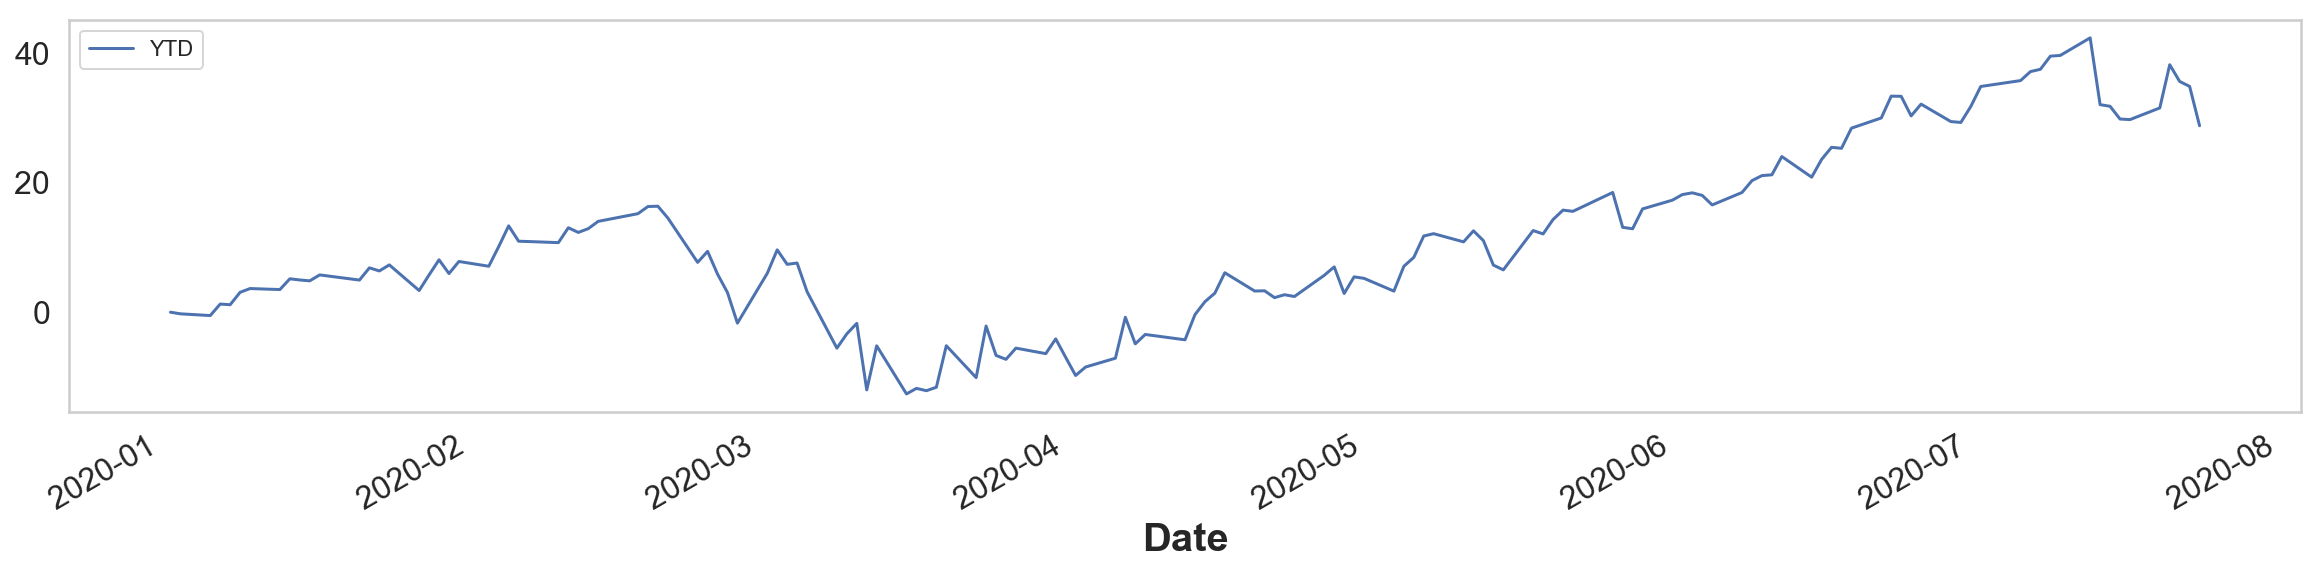

In [20]:
fig, ax = plt.subplots(1,1, figsize=(20,4))
df_tckr.plot(use_index=True, y="YTD",ax=ax, grid=False)

## ## Plotting multiple companies 

In [21]:
import time as time 
def plot_market_cap(tickr_list, START_DATE, END_DATE):
    
    total_data = {}
    for tickr in tickr_list:
        total_data[tickr] = {}
        print('Looking at: {}'.format(tickr))
        yf_tickr = yf.Ticker(tickr)
        #try:
        #    _shares_outstanding = yf_tickr.info['sharesOutstanding']
        #except(IndexError):
        #    print('Shares outstanding not found')
        #    _shares_outstanding = None
        
        df_tckr = yf_tickr.history(start=START_DATE, end=END_DATE, actions=False)
        df_tckr['YTD'] = (df_tckr['Open'] - df_tckr['Open'][0]) * 100 / df_tckr['Open'][0]
            
        total_data[tickr]['hist'] = df_tckr
        #total_data[tickr]['shares'] = _shares_outstanding
        time.sleep(np.random.randint(10))
        
    return total_data

In [22]:
tickr_list = ['AAPL', 'AMD', 'MSFT','FB','CVX','XOM']
#tickr_list = ['S5INFT', 'SPX','XLG','SPN','S5INDU']
#tickr_list = SP_500_df['Symbol'].to_list()
data = plot_market_cap(tickr_list, START_DATE, END_DATE)

Looking at: AAPL
Looking at: AMD
Looking at: MSFT
Looking at: FB
Looking at: CVX
Looking at: XOM


In [23]:
ytd_stat = pd.DataFrame()
for tickr in tickr_list: 
    ytd_stat[tickr] = data[tickr]['hist']['YTD']

Text(0, 0.5, 'YTD %Return 2020')

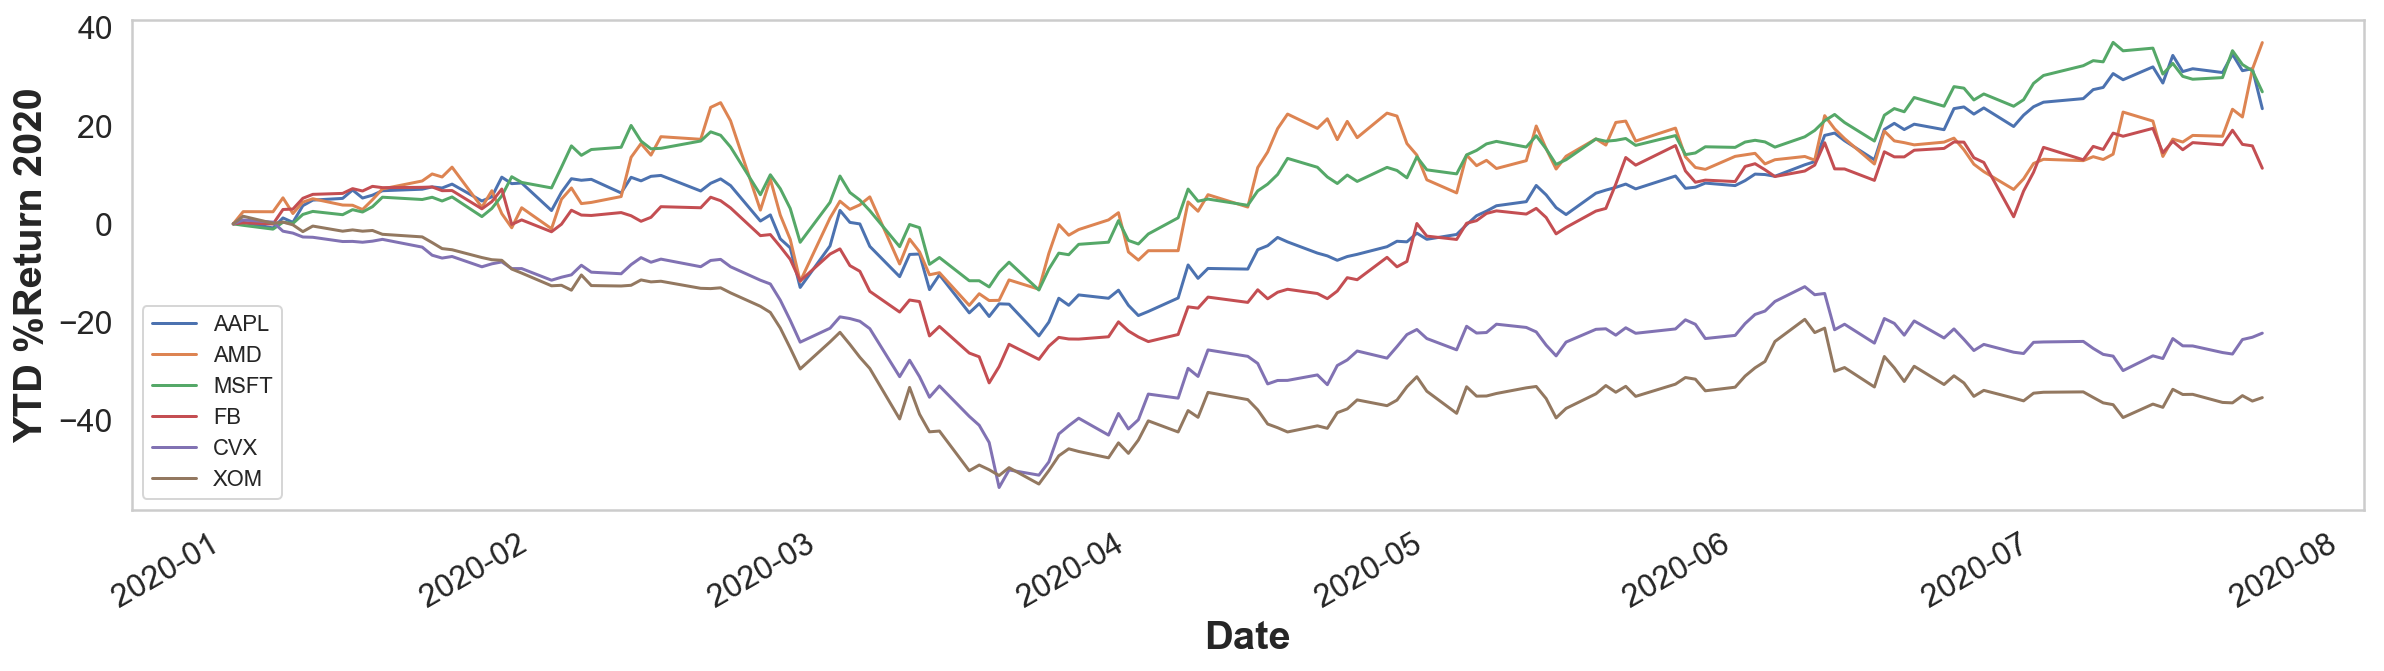

In [24]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
for tickr in tickr_list:
    ytd_stat.plot(use_index=True, y=tickr,ax=ax, grid=False, label=tickr)
ax.set_ylabel('YTD %Return 2020')